---
title: "Relaciones en los datos"
---

Las variables de los conjuntos de datos tienen relaciones entre sí. En este capítulo, examinarás las relaciones entre datos numéricos, categóricos e incluso DateTime, explorando la dirección y la fuerza de estas relaciones, así como las formas de visualizarlas.

## Patrones a lo largo del tiempo

In [1]:
#| echo: true
#| eval: false
divorce = pd.read_csv("divorce.csv")
divorce.head()

![](images/paste-53.png)

-   Importando data DateTime

    -   DataTime necesita ser explicitamente declarada en pandas

In [2]:
#| echo: true
#| eval: false
divorce.dtypes

![](images/paste-54.png)

In [3]:
#| echo: true
#| eval: false
divorce = pd.read_csv("divorce.csv", parse_dates=["marriage_date"])
divorce.dtypes

![Este tipo de datos abre muchas posibilidades para el análisis, como observar patrones a lo largo de años, meses o incluso días de la semana.](images/paste-55.png)

-   Conviritiendo los datos a DataTime

    -   `pd.to_datetime()` convierte los argumentos de datos DateTime

In [4]:
#| echo: true
#| eval: false
divorce['marriage_date'] = pd.to_datetime(divorce['marriage_date'])
divorce_dtypes

![](images/paste-57.png)

-   Creando datos DateTime

In [5]:
#| echo: true
#| eval: false
divorce.head(2)

![](images/paste-58.png)

In [6]:
#| echo: true
#| eval: false
divorce['marriage_date'] = pd.to_datetime(divorce[['month', 'day', 'year']])
divorce.head(2)

![](images/paste-59.png)

Es posible extraer sólo el mes, el día o el año de una columna que contenga una fecha completa, usando los atributos `dt.month`, `dt.day` y `dt.year.`

In [7]:
#| echo: true
#| eval: false
divorce['marriage_month'] = divorce['marriage_date'].dt.month()
divorce.head()

![](images/paste-60.png)

-   Visualizando patrones a lo largo del tiempo

In [8]:
#| echo: true
#| eval: false
sns.lineplot(data=divorce, x='marriage_month', y='marriage_duration')
plt.show()

![](images/paste-61.png)

Los amplios intervalos de confianza sugieren que se necesita más análisis.

### Importar datos DateTime

¡Ahora trabajarás con todo el conjunto de datos del divorcio! Los datos desciben los matrimonios mexicanos disueltos entre 2000 y 2015. Contiene las fechs de matrimonio y divorcio, el nivel educativo, la fecha de nacimiento, los ingresos de cada miembro de la pareja y la duración del matrimonio, así como el número de hijos que tenía la pareja en el momento del divorcio.

Los nombres de ls columnas y los tipos de datos son los siguientes:

![](images/paste-62.png)

¡Parece que hay mucha información de fecha en estos datos que todavía no son de tipo DateTime! Tu tarea es arreglarlo para que puedas explorar patrones a lo largo del tiempo.

In [9]:
import pandas as pd

ruta = './data/divorce.csv'
divorce = pd.read_csv(ruta)
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


#### Instrucciones

-   Importa `divorce.csv`, guardando como DataFrame, `divorce`: indica en la función de importación que las columnas `divorce_date`, `dob_man`, `dob_woman`, y `marriage_date` deben importarse como valores DateTime.

In [10]:
# Import divorce.csv, parseing the appropriate columns as dateds in the import
divorce = pd.read_csv('./data/divorce.csv', parse_dates=['divorce_date', 'dob_man', 'dob_woman', 'marriage_date'])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object


Buen trabajo parseando esas fechas al mismo tiempo que importabas los datos en pandas. ¡Ahora, intenta actualizar los tipos de datos DateTime en una DataFrame que ya ha sido importado!

### Actualizar tipo de datos a DateTime

Ahora se te ha cargado el DataFrame `divorce`, pero una columna se almacea como una cadena que debería ser un dato DateTime. ¿Cuál es? Una vez que hayas identificado la columna, la actualizarás para que puedas explorarla más de cerca en el siguiente ejercicio.

In [11]:
ruta = './data/divorce.csv'
divorce = pd.read_csv(ruta, parse_dates=['divorce_date', 'dob_man', 'dob_woman'])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date                object
marriage_duration           float64
num_kids                    float64
dtype: object


#### Instrucciones

1.  **Pregunta**

¿Cuál de las columnas del DataFrame `divorce` no se ha actualizado a un tipo de datos DateTime, pero debería hacerse?

**Respuestas posibles**

-   [ ] `divorce_date`
-   [x] `marriage_date`
-   [ ] `education_woman`
-   [ ] `num_kids`

2.  Covierte la columna `marriage_date` del DataFrame `divorce` en valores de `DateTime`.

In [12]:
# Convert the marriage_date column to DateTime values
divorce['marriage_date'] = pd.to_datetime(divorce['marriage_date'])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object


Ahora, estás listo para ver cómo la fecha de matrimonio de una pareja se relaciona con otros datos.

### Visualizar las relaciones a lo largo del tiempo

Ahora que tus datos de fechas se guardan como datos DateTime, ¡puedes explorar patrones a lo largo del tiempo! ¿Tiene relación el año en que se casó una pareja con el número de hijos que tiene en el momento del divorcio? ¡Tu tarea es averiguarlo!

#### Instrucciones

1.  Define una columna llamada `marriage_year`, que solo contiene la parte del año de la columna `marriage_date`.

In [13]:
# Define the marriage_year column
divorce['marriage_year'] = divorce['marriage_date'].dt.year

2.  Crea un gráfico de líneas que muestre el número medio de hijos que tuvo una pareja durante su matrimonio, ordenado por el año en que la pareja se casó.

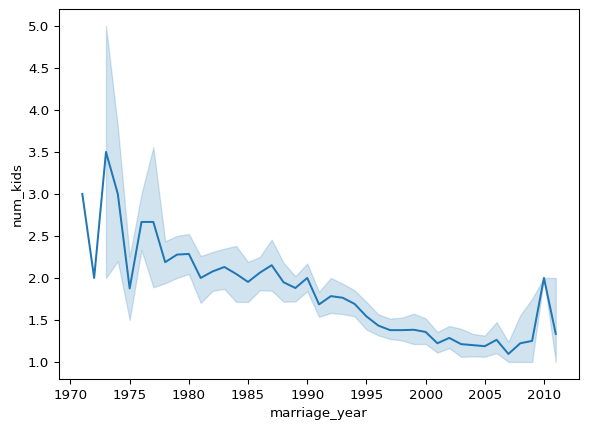

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a lineplot showing the average  number of kids by year
sns.lineplot(data=divorce, x='marriage_year', y='num_kids')
plt.show()

¡Bien hecho! Haz descubierto un patrón aquí, parece que las parejas que se casaron en años posteriores también tuvieron menos hijos durante su matrimonio.

## Correlación

-   Correlación
    -   Describe la dirección de la relación de entre dos variables así como su fuerza.

    -   Configurar `numeric_only=True` previene errores con columnas no numéricas.

    -   El método `.cor()` calcula el coeficiente de correlación de Pearson.

In [15]:
divorce.corr(numeric_only=True)

,income_man,income_woman,marriage_duration,num_kids,marriage_year
income_man,1.000000,0.318047,0.085321,0.040848,0.019170
income_woman,0.318047,1.000000,0.078677,-0.018015,0.026433
marriage_duration,0.085321,0.078677,1.000000,0.447358,-0.812469
num_kids,0.040848,-0.018015,0.447358,1.000000,-0.461495
marriage_year,0.019170,0.026433,-0.812469,-0.461495,1.000000


-   Mapas de calor de correlación

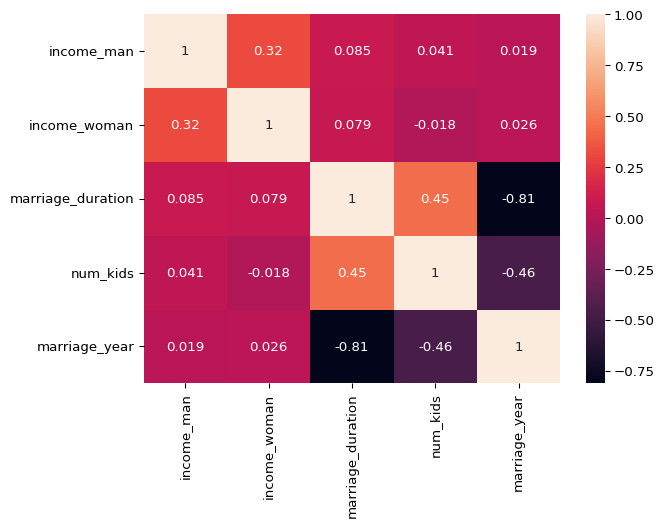

In [16]:
sns.heatmap(divorce.corr(numeric_only=True), annot=True)
plt.show()

-   Correlación en contexto

In [17]:
divorce['divorce_date'].min()

Timestamp('2000-01-08 00:00:00')

In [18]:
divorce['divorce_date'].max()

Timestamp('2015-11-03 00:00:00')

-   Visualización de las relaciones
    - Es importante complementar nuestros cálculos de correlación con gráficos de dispersión.

+-----------------------------------------------------------+------------------------------------------------------+
| ![](images/paste-64.png)                                  | ![](images/paste-65.png)                             |
+-----------------------------------------------------------+------------------------------------------------------+
| -   Fuerte relación, pero no lineal                       | -   Relación cuadrática; no lineal                   |
|                                                           |                                                      |
| -   El coeficiente de correlación de Pearson: `-6.48e-18` | -   Coeficiente de correlación de Pearson: `.971211` |
+-----------------------------------------------------------+------------------------------------------------------+


- Scatter plots

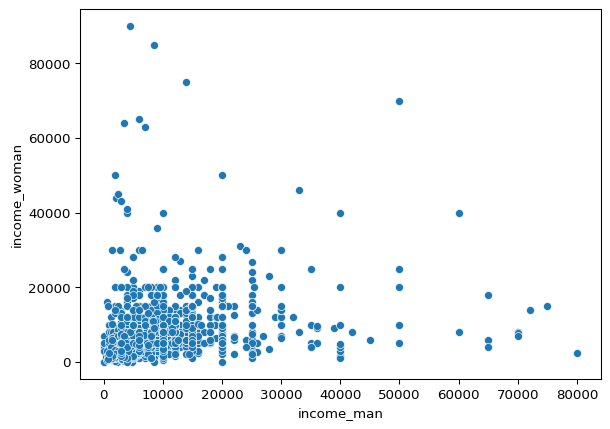

In [19]:
sns.scatterplot(data=divorce, x='income_man', y='income_woman')
plt.show()

- Pairplots
    - Es útil para obtener una descripción general rápida de las relaciones dentro del conjunto de datos.
    - Tanta información en un elemento visual puede ser difícil de interpretar con grandes conjuntos de datos.


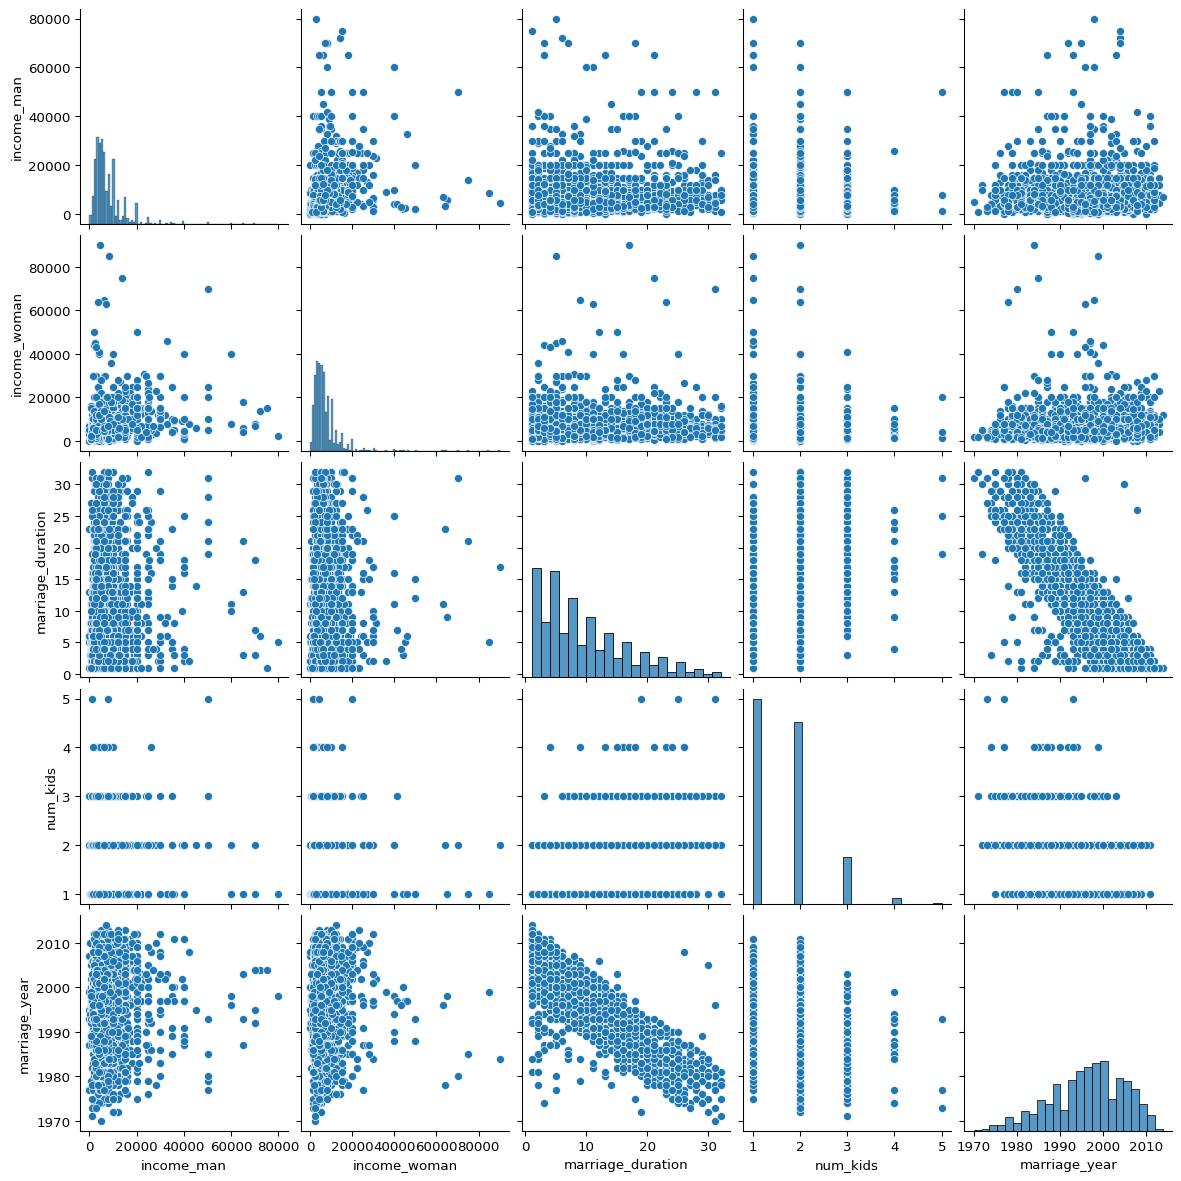

In [20]:
sns.pairplot(data=divorce)
plt.show()

Es posible limitar el número de relaciones graficadas estableciendo el argumento `vars` igual a las variables de interés.


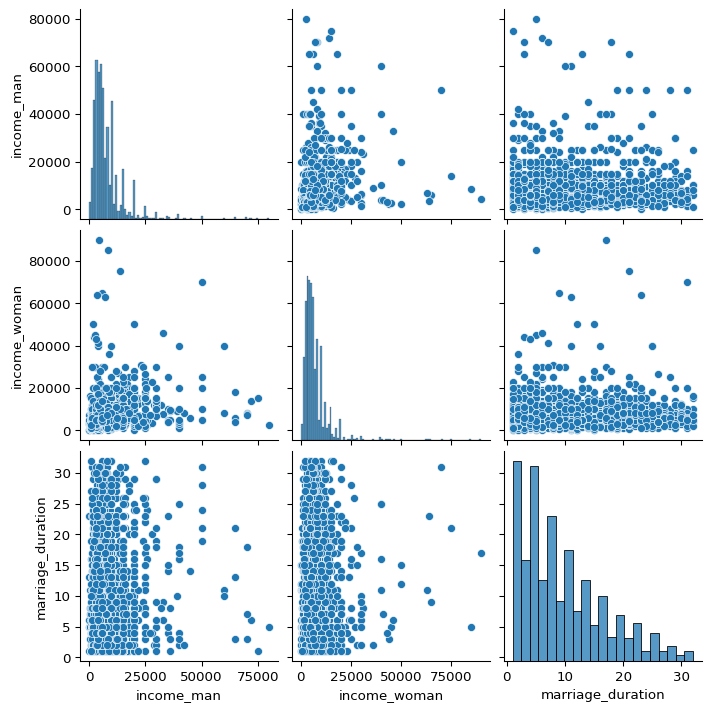

In [21]:
sns.pairplot(data=divorce, vars=['income_man', 'income_woman', 'marriage_duration'])
plt.show()

### Interpretar un mapa de calor

¿Cuál de las siguientes afirmaciones es correcta respecto a las relaciones entre variables en el DataFrame `divorce`?

In [22]:
divorce['marriage_moth'] = divorce['marriage_date'].dt.month
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,marriage_year,marriage_moth
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,2000,6
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN,2001,9
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0,2000,2
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN,2006,5
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN,2007,8


#### Instrucciones 

**Respuestas Posibles**

- [ ] `marriage_duration` está fuertemente correlacionada de forma positiva con `marriage_month`.

- [ ] La correlación entre `num_kids` y `income_man` es más fuerte que la correlación entre `num_kids` y `marriage_duration`.

- [ ] Un `marriage_year` más tardío provoca un menor número de hijos, representado por `num_kids`.

- [X] Un `marriage_year` más tardío está correlacionado con tener menos hijos.


### Visualizar las relaciones entre variables

En el último ejercicio, habrás observado que un `marriage_duration` más largo está correlacionado con tener más hijos , representado por la columna `num_kids`. El coeficiente de correlación entre las variables `marriage_duration` y `num_kids` es `0.45`.

En este ejercicio, crearás un gráfico de dispersión para visualizar la relación entre estas variables.

#### Instrucciones

- Cree un diagrama de dispersión que muestre `marriage_duration` en el eje x y `num_kids` en el eje y.


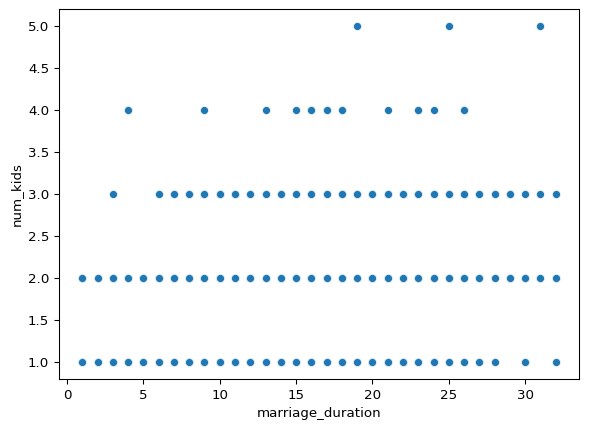

In [23]:
# Create the scatterplot
sns.scatterplot(data=divorce, x='marriage_duration', y='num_kids')
plt.show()

Hay una ligera relación positiva en el gráfico de dispersión. En el conjunto de datos, las parejas sin hijos no tienen valor en la columna `num_kids`. Si estás seguro que todos o la mayoría de los valores faltantes en `num_kids` están relacionados con parejas sin hijos, podrías considerar actualizar estos valores a 0, lo que podría aumentar la correlación.


### Visualizar las relaciones entre múltiples variables

Seaborn's `.pairplot()` es excelente para comprender las relaciones entre varias o todas las vatiables de un conjunto de datos, agregando gráficos de dispersión por pares en un solo visual.

Tu tarea consiste en utilizar un `pairplot` par comparar la relación entre 'marriage_duration' y 'income_woman'.

#### Instrucciones

- Crea un diagrama de pares para visualizar las relaciones entre `income_woman` y `marriage_duration` en el DataFrame `divorce`.


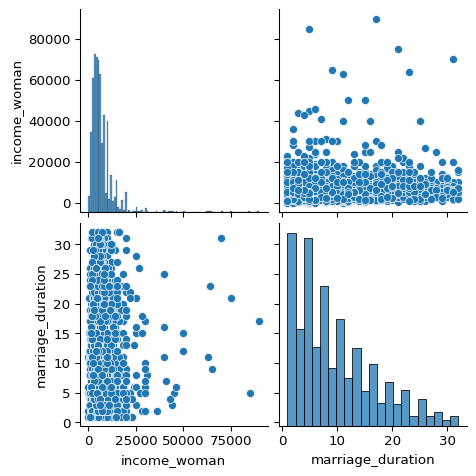

In [24]:
# Create a pairplot for income_woman and marriage_duration
sns.pairplot(data=divorce, vars=['income_woman', 'marriage_duration'])
plt.show()

Al igual que la matriz de correlación , puedes ver que la relación entre `income_woman` y `marriage_duration` no es fuerte. También puedes tener una idea de las distribuciones de ambas variables en los gráficos superior izquierdo e inferior derecho.


## Relaciones y distribuciones de los factores

- Nivel de educación: male partner


In [25]:
divorce['education_man'].value_counts()

education_man
Professional    1313
Preparatory      501
Secondary        288
Primary          100
Other              3
Name: count, dtype: int64

- Explorando las relaciones categóricas


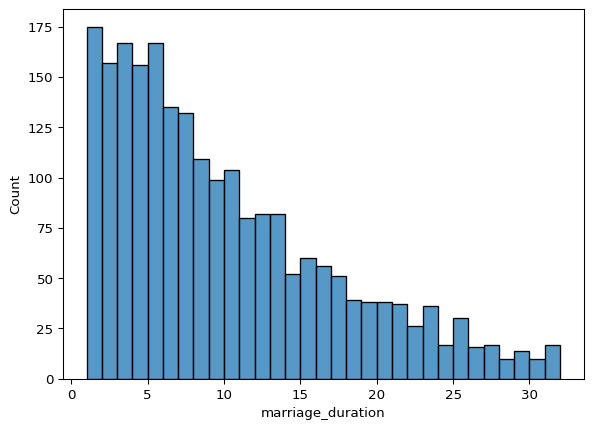

In [26]:
sns.histplot(data=divorce, x='marriage_duration', binwidth=1)
plt.show()

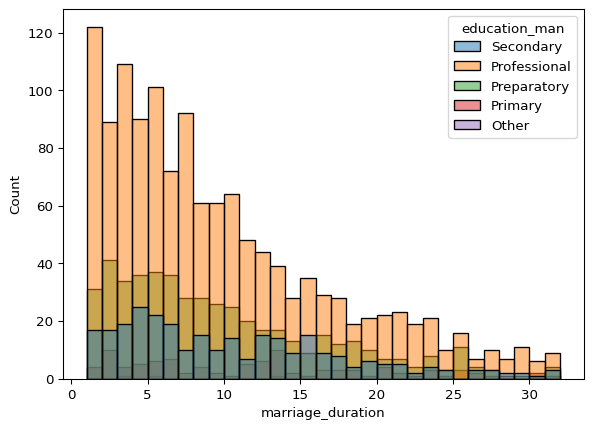

In [27]:
sns.histplot(data=divorce, x='marriage_duration', hue='education_man', binwidth=1)
plt.show()

- Kernel Desnsity Estimate (KDE) plots


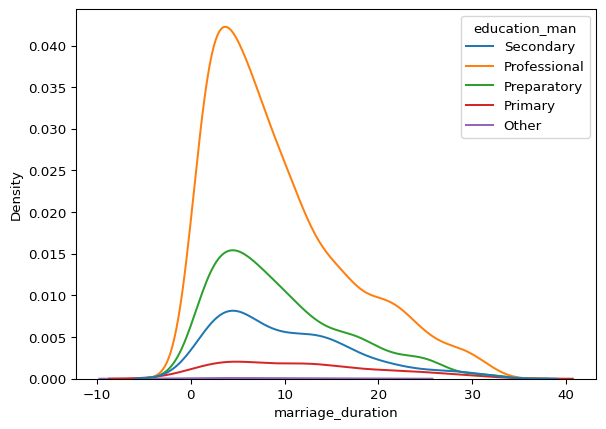

In [28]:
sns.kdeplot(data=divorce, x='marriage_duration', hue='education_man')
plt.show()

Los gráficos KDE nos permiten visualizar las distribuciones. Los KDE son más interpretables, especialmente cuando se muestran varias distribuciones.

La distribución con KDE parece sugerir que algunas parejas tuvieron duraciones menores a cero.

Para solucionar esto, podempos utilizar el argumento de la palabra clave `cut`.


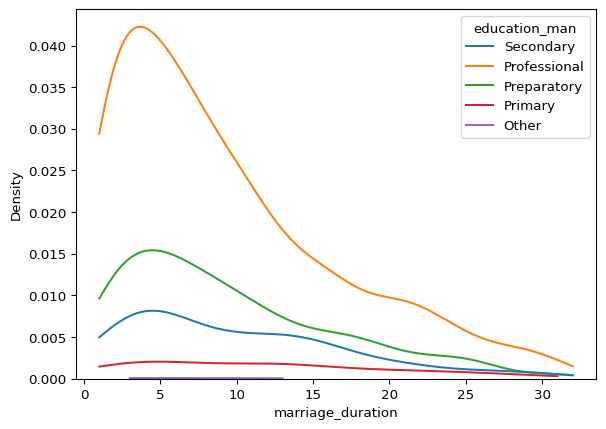

In [29]:
sns.kdeplot(data=divorce, x='marriage_duration', hue='education_man', cut=0)
plt.show()

- Gráficos KDE acumulativos


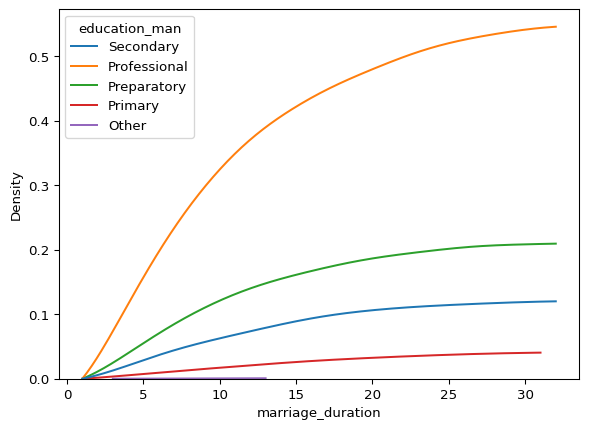

In [30]:
import seaborn as sns
sns.kdeplot(data=divorce, x='marriage_duration', hue='education_man', cut=0, cumulative=True)
plt.show()

Este gráfico describe la probabilidad de que la duración del matrimonio sea menor o igual al valor del eje x para cada nivel de educación de la pareja masculina.

- Relación entre la edad del matrimonio y la educación
    - Hay una relación entre la edad al momento del matrimonio y el nivel de educación?


In [31]:
divorce['man_age_marriage'] = divorce['marriage_year'] - divorce['dob_man'].dt.year
divorce['woman_age_marriage'] = divorce['marriage_year'] - divorce['dob_woman'].dt.year

- Scatter plot con las variables categóricas


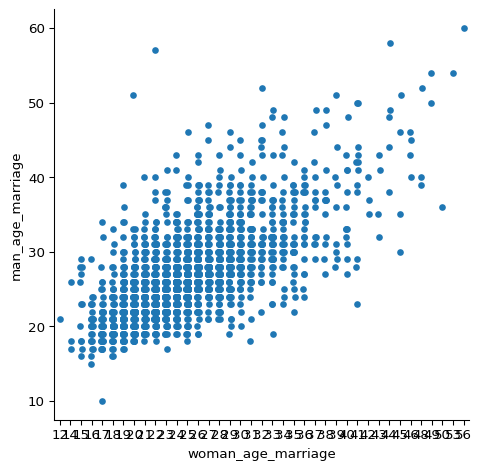

In [32]:
sns.catplot(data=divorce, x='woman_age_marriage', y='man_age_marriage')
plt.show()

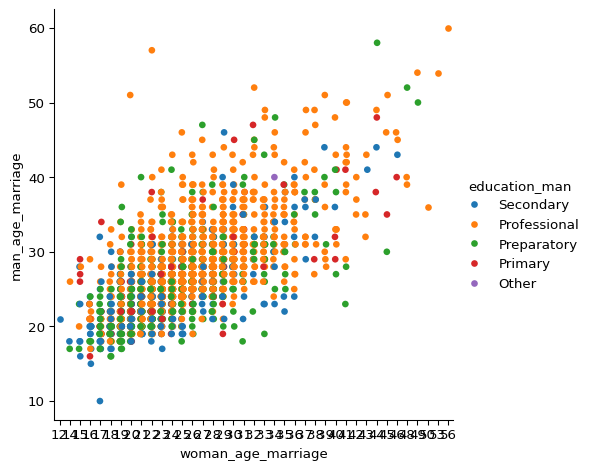

In [33]:
sns.catplot(data=divorce, x='woman_age_marriage', y='man_age_marriage', hue='education_man')
plt.show()

### Datos categóricos en gráficos de dispersión

En el video se exploro cómo se relacionan el nivel educativo de los hombres y la edad al casarse con otras variables de nuestro conjunto de datos, el DataFrame `divorce`. Ahora verás cómo se relacionan la formación de las mujeres y la edad al casarse con otras variables.

Tu tarea consiste en crear un diagrama de dispersión de la edad y los ingresos de cada mujer, incorporando la variable categórica del nivel educativo para obtener un contexto adicional.


#### Instrucciones

- Crea un gráfico de dispersión que muestre `woman_age_marriage` en el eje de abcisas y `income_woman` en el eje de las ordenadas, cada punto de datos debe colorearse en función del nivel educativo de la mujer, representado por `education_woman`.

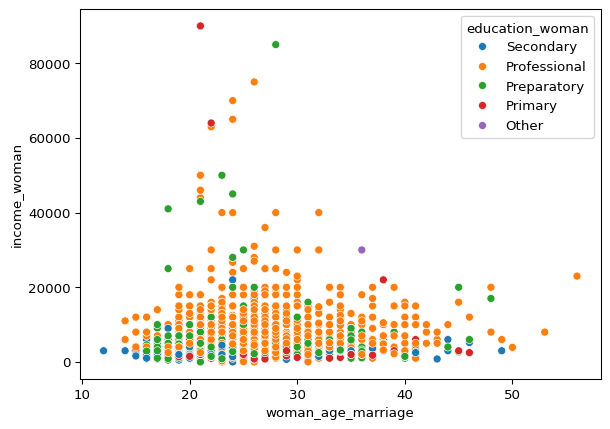

In [34]:
# Create a scatter plot
sns.scatterplot(data=divorce, x='woman_age_marriage', y='income_woman', hue='education_woman')
plt.show()

Parece que hay una correlación positiva entre la educación profesional y los salarios más altos, como cabría esperar. La relación entre la edad de las mujeres al casarse y el nivel educativo es un poco menos clara.


### Explorando con gráficos KDE

Los gráficos de Estimación de Densidad del Núcleo (KDE) son una gran alternativa a los histogramas cuando quieres mostrar varias distribuciones en el mismo gráfico.

Supongamos que te interesa la relación entre la duración del matrimonio y el número de hijos que tiene una pareja. Como los valores de la columna `num_kids` sólo van de uno a cinco, puedes graficar el KDE de cada valor en la misma gráfica.

Recuerda que la columna `num_kids` de `divorce` solo muestra los valores `N/A` de las parejas sin hijos, por lo que solo verás las distribuciones de las parejas divorciadas con al menos un hijo.


#### Instrucciones

1.  Cree un gráfico KDE que muestre `marriage_duration` en el eje x y una línea de color diferente para cada posible número de hijos que pueda tener una pareja, representada por `num_kids`.

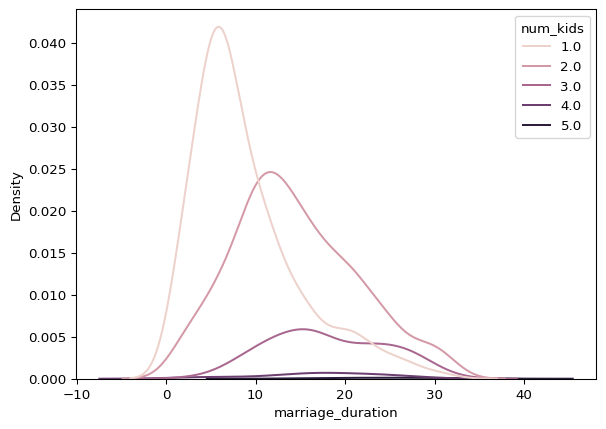

In [35]:
# Create the KDE plot
sns.kdeplot(data=divorce, x='marriage_duration', hue='num_kids')
plt.show()

2. Observa que actualmente el gráfico muestra duraciones del matrimonio inferiores a cero; actualiza el grafico KDE para que la duración del matrimonio no pueda suavizarse más allá de los puntos de datos extremos.

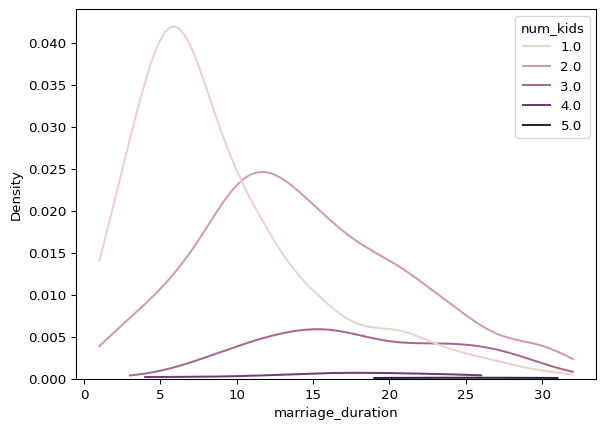

In [36]:
# Update the KDE plot so that marriage durantion can't be smoothed too far
sns.kdeplot(data=divorce, x='marriage_duration', hue='num_kids', cut=0)
plt.show()

3. Actualiza el código del gráfico KDE del paso anterior para que muestre una función de distribución acumulativo para cada número de hijos que tiene una pareja.

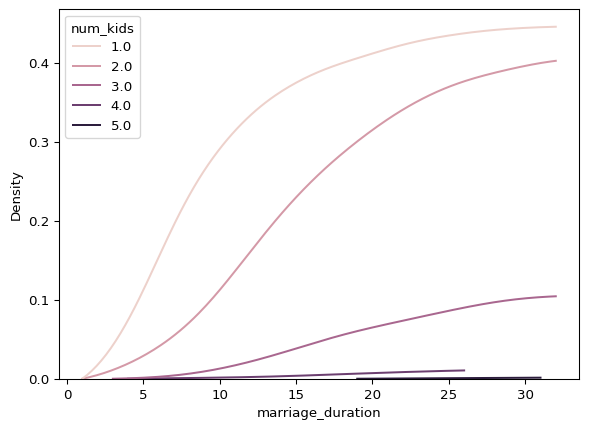

In [37]:
# Update the KDE plot to show a cumulative distribution function
sns.kdeplot(data=divorce, x='marriage_duration', hue='num_kids', cut=0, cumulative=True)
plt.show()

Parece que hay una correlación positiva entre matrimonios más largos y más hijos, pero por supuesto, esto no indica causalidad. También puedes ver que hay muchos menos datos sobre parejas con más de dos hijos; esto nos ayuda a entender cuan confiables son nuestros hallazgos.